In [1]:
# LinearRegression is a machine learning library for linear regression
from sklearn.linear_model import LinearRegression

# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-darkgrid')

# yahoo finance is used to fetch data
import yfinance as yf
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")

[*********************100%***********************]  2 of 2 completed


2021-05-28
[*********************100%***********************]  1 of 1 completed


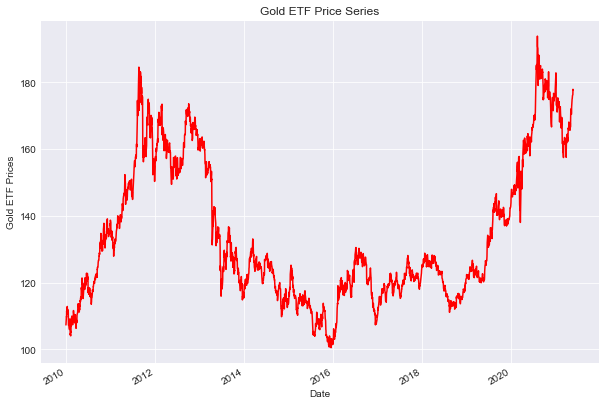

In [2]:
#https://finance.yahoo.com/quote/GLD/history?p=GLD
from datetime import date
today = str(date.today())
print(today) 


Df = yf.download('GLD', '2010-01-01', today, auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

In [3]:
# Define explanatory variables
Df['S_3'] = Df['Close'].rolling(window=3).mean()
Df['S_9'] = Df['Close'].rolling(window=9).mean()
Df['next_day_price'] = Df['Close'].shift(-1)

Df = Df.dropna()
X = Df[['S_3', 'S_9']]

# Define dependent variable
y = Df['next_day_price']

In [4]:
t = .8
t = int(t*len(Df))

# Train dataset
X_train = X[:t]
y_train = y[:t]

# Test dataset
X_test = X[t:]
y_test = y[t:]

In [5]:
# Create a linear regression model
linear = LinearRegression().fit(X_train, y_train)
print("Linear Regression model")
print("Gold ETF Price (y) = %.2f * 3 Days Moving Average (x1) \
+ %.2f * 9 Days Moving Average (x2) \
+ %.2f (constant)" % (linear.coef_[0], linear.coef_[1], linear.intercept_))

Linear Regression model
Gold ETF Price (y) = 1.21 * 3 Days Moving Average (x1) + -0.21 * 9 Days Moving Average (x2) + 0.59 (constant)


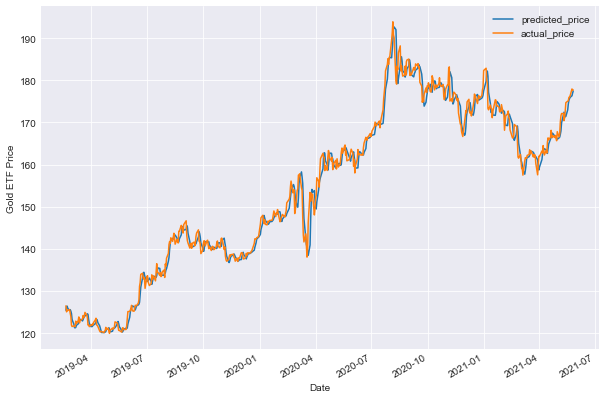

In [6]:
predicted_price = linear.predict(X_test)
predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 7))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold ETF Price")
plt.show()

In [7]:
predicted_price

,price
Date,
2019-02-19,125.425869
2019-02-20,126.329599
2019-02-21,126.399201
2019-02-22,125.884341
2019-02-25,125.394336
...,...
2021-05-20,175.645269
2021-05-21,175.954928
2021-05-24,176.334555


In [8]:
y_test

Date
2019-02-19    126.480003
2019-02-20    125.050003
2019-02-21    125.500000
2019-02-22    125.370003
2019-02-25    125.580002
                 ...    
2021-05-20    176.039993
2021-05-21    176.350006
2021-05-24    177.949997
2021-05-25    177.639999
2021-05-26    177.710007
Name: next_day_price, Length: 573, dtype: float64

In [9]:
predicted_price[-1:],y_test[-1:]

(                 price
 Date                  
 2021-05-26  177.448105,
 Date
 2021-05-26    177.710007
 Name: next_day_price, dtype: float64)

In [10]:

df_out = pd.merge(X, predicted_price, how = 'left', left_index = True, right_index = True)

In [11]:
y

Date
2010-01-13    112.029999
2010-01-14    110.860001
2010-01-15    111.519997
2010-01-19    108.940002
2010-01-20    107.370003
                 ...    
2021-05-20    176.039993
2021-05-21    176.350006
2021-05-24    177.949997
2021-05-25    177.639999
2021-05-26    177.710007
Name: next_day_price, Length: 2862, dtype: float64

In [12]:
Df

,Close,S_3,S_9,next_day_price
Date,,,,
2010-01-13,111.540001,111.626666,110.598889,112.029999
2010-01-14,112.029999,111.353333,111.123333,110.860001
2010-01-15,110.860001,111.476667,111.241111,111.519997
2010-01-19,111.519997,111.469999,111.443333,108.940002
2010-01-20,108.940002,110.440000,111.157778,107.370003
...,...,...,...,...
2021-05-20,175.960007,175.386668,173.262222,176.039993
2021-05-21,176.039993,175.720001,173.698888,176.350006
2021-05-24,176.350006,176.116669,174.166667,177.949997


In [13]:
X

,S_3,S_9
Date,,
2010-01-13,111.626666,110.598889
2010-01-14,111.353333,111.123333
2010-01-15,111.476667,111.241111
2010-01-19,111.469999,111.443333
2010-01-20,110.440000,111.157778
...,...,...
2021-05-20,175.386668,173.262222
2021-05-21,175.720001,173.698888
2021-05-24,176.116669,174.166667


In [14]:
predicted_price[-1:] ,y_test[-1:]

(                 price
 Date                  
 2021-05-26  177.448105,
 Date
 2021-05-26    177.710007
 Name: next_day_price, dtype: float64)

In [15]:

sonuc=Df.sort_values(by='Date', ascending=False)
sonuc.to_excel('saved_file.xlsx')

In [16]:
sonuc

,Close,S_3,S_9,next_day_price
Date,,,,
2021-05-26,177.639999,177.313334,175.725555,177.710007
2021-05-25,177.949997,176.779999,175.002223,177.639999
2021-05-24,176.350006,176.116669,174.166667,177.949997
2021-05-21,176.039993,175.720001,173.698888,176.350006
2021-05-20,175.960007,175.386668,173.262222,176.039993
...,...,...,...,...
2010-01-20,108.940002,110.440000,111.157778,107.370003
2010-01-19,111.519997,111.469999,111.443333,108.940002
2010-01-15,110.860001,111.476667,111.241111,111.519997
